In [1]:
!pip install pandas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
a_file = open('smni_eeg_data/a_1_co2a0000364/co2a0000364.rd.010', "r")
lines = a_file.readlines()
a_file.close()

new_file = open("smni_eeg_data/a_1_co2a0000364/co2a0000364.rd.010", "w")
for line in lines:
    if line.strip("\n") != "line1":
        new_file.write(line)
        
new_file.close()

In [3]:
def clean_files(file_name):

    lines = []

    with open(file_name, "r") as fp:
        lines = fp.readlines()

    with open(file_name, "w") as fp:
        for number, line in enumerate(lines):
            if number == 0:
                fp.write('Trail# SensorPosition SensorNumber SensorValue\n')
            if number not in [0,1,2,3,4]:
                fp.write(line)
        

In [4]:
c_n_files = ['c_n_co2c0000337/co2c0000337.rd.021','c_n_co2c0000337/co2c0000337.rd.029','c_n_co2c0000337/co2c0000337.rd.033','c_n_co2c0000337/co2c0000337.rd.043','c_n_co2c0000337/co2c0000337.rd.053','c_n_co2c0000337/co2c0000337.rd.067','c_n_co2c0000337/co2c0000337.rd.073','c_n_co2c0000337/co2c0000337.rd.083','c_n_co2c0000337/co2c0000337.rd.087','c_n_co2c0000337/co2c0000337.rd.089']
c_m_files = ['c_m_co2c0000337/co2c0000337.rd.017','c_m_co2c0000337/co2c0000337.rd.023','c_m_co2c0000337/co2c0000337.rd.025','c_m_co2c0000337/co2c0000337.rd.027','c_m_co2c0000337/co2c0000337.rd.041','c_m_co2c0000337/co2c0000337.rd.047','c_m_co2c0000337/co2c0000337.rd.051','c_m_co2c0000337/co2c0000337.rd.055','c_m_co2c0000337/co2c0000337.rd.065','c_m_co2c0000337/co2c0000337.rd.071']
c_1_files = ['c_1_co2c0000337/co2c0000337.rd.000','c_1_co2c0000337/co2c0000337.rd.002','c_1_co2c0000337/co2c0000337.rd.016','c_1_co2c0000337/co2c0000337.rd.024','c_1_co2c0000337/co2c0000337.rd.026','c_1_co2c0000337/co2c0000337.rd.028','c_1_co2c0000337/co2c0000337.rd.030','c_1_co2c0000337/co2c0000337.rd.032','c_1_co2c0000337/co2c0000337.rd.034','c_1_co2c0000337/co2c0000337.rd.036']

In [5]:
a_1_files = ['a_1_co2a0000364/co2a0000364.rd.000', 'a_1_co2a0000364/co2a0000364.rd.002', 'a_1_co2a0000364/co2a0000364.rd.010', 'a_1_co2a0000364/co2a0000364.rd.012', 'a_1_co2a0000364/co2a0000364.rd.014','a_1_co2a0000364/co2a0000364.rd.018', 'a_1_co2a0000364/co2a0000364.rd.020', 'a_1_co2a0000364/co2a0000364.rd.022', 'a_1_co2a0000364/co2a0000364.rd.024', 'a_1_co2a0000364/co2a0000364.rd.028']
a_m_files = ['a_m_co2a0000364/co2a0000364.rd.009', 'a_m_co2a0000364/co2a0000364.rd.017', 'a_m_co2a0000364/co2a0000364.rd.023', 'a_m_co2a0000364/co2a0000364.rd.025', 'a_m_co2a0000364/co2a0000364.rd.027','a_m_co2a0000364/co2a0000364.rd.037', 'a_m_co2a0000364/co2a0000364.rd.041', 'a_m_co2a0000364/co2a0000364.rd.047', 'a_m_co2a0000364/co2a0000364.rd.055', 'a_m_co2a0000364/co2a0000364.rd.061']
a_n_files = ['a_n_co2a0000364/co2a0000364.rd.007', 'a_n_co2a0000364/co2a0000364.rd.015', 'a_n_co2a0000364/co2a0000364.rd.019', 'a_n_co2a0000364/co2a0000364.rd.031', 'a_n_co2a0000364/co2a0000364.rd.039','a_n_co2a0000364/co2a0000364.rd.043', 'a_n_co2a0000364/co2a0000364.rd.045', 'a_n_co2a0000364/co2a0000364.rd.049', 'a_n_co2a0000364/co2a0000364.rd.057', 'a_n_co2a0000364/co2a0000364.rd.059']

In [6]:
file_list_c = [c_n_files,c_m_files,c_1_files]
file_list_a = [a_1_files,a_m_files,a_n_files]

In [7]:
for a in file_list_a:
    for file in a:
        clean_files(f"smni_eeg_data/{file}")

In [8]:
for c in file_list_c:
    for file in c:
        clean_files(f"smni_eeg_data/{file}")

In [9]:
import os

In [10]:
df = pd.DataFrame(columns=['Trail#','SensorPosition','SensorNumber','SensorValue'])

In [11]:
for c in file_list_c:
    for i in c:
        temp_df = pd.read_csv("smni_eeg_data/"+i, delimiter=' ')
        temp_df['alcoholic'] = temp_df['SensorValue'].apply([lambda x: 0])
        temp_df['paradigm'] = temp_df['SensorValue'].apply([lambda x: str(i[2])])     
        df = pd.concat([df, temp_df])

In [12]:
df

,Trail#,SensorPosition,SensorNumber,SensorValue,alcoholic,paradigm
0,21,FP1,24,-2.228,0.0,n
1,21,FP1,25,-1.251,0.0,n
2,21,FP1,26,-1.251,0.0,n
3,21,FP1,27,-2.716,0.0,n
4,21,FP1,28,-4.669,0.0,n
...,...,...,...,...,...,...
16418,36,Y,251,-12.787,0.0,1
16419,36,Y,252,-14.252,0.0,1
16420,36,Y,253,-13.275,0.0,1
16421,36,Y,254,-10.834,0.0,1


In [13]:
for a in file_list_a:
    for i in a:
        temp_df = pd.read_csv("smni_eeg_data/"+i, delimiter=' ')
        temp_df['alcoholic'] = temp_df['SensorValue'].apply([lambda x: 1])
        temp_df['paradigm'] = temp_df['SensorValue'].apply([lambda x: str(i[2])])   
        df = pd.concat([df, temp_df])

In [14]:
df[df['Trail#'] == '59']

,Trail#,SensorPosition,SensorNumber,SensorValue,alcoholic,paradigm
0,59,FP1,24,1.709,1.0,n
1,59,FP1,25,2.197,1.0,n
2,59,FP1,26,3.174,1.0,n
3,59,FP1,27,4.639,1.0,n
4,59,FP1,28,5.615,1.0,n
...,...,...,...,...,...,...
16418,59,Y,251,-8.545,1.0,n
16419,59,Y,252,-8.057,1.0,n
16420,59,Y,253,-8.057,1.0,n
16421,59,Y,254,-6.592,1.0,n


In [15]:
df = df.loc[df.SensorNumber != 'chan']

In [16]:
df['paradigm_class'] = df['paradigm'].replace({'n':0, '1':1, 'm':2})

In [17]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [18]:
X = df[df['paradigm'] == 'n'][['SensorValue','paradigm_class','SensorNumber']]
y = df[df['paradigm'] == 'n']['alcoholic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
clf = RidgeClassifier().fit(X,y)

In [20]:
clf.score(X,y)

0.5706601466992665

In [21]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range= (-1,1), )
scaler.fit(X)

MinMaxScaler(feature_range=(-1, 1))

In [23]:
X = scaler.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# clf = svm.SVC()
# clf.fit(X,y)

In [25]:
df['Trail#'].unique()

array(['21', '29', '33', '43', '53', '67', '73', '83', '87', '89', '17',
       '23', '25', '27', '41', '47', '51', '55', '65', '71', '0', '2',
       '16', '24', '26', '28', '30', '32', '34', '36', '10', '12', '14',
       '18', '20', '22', '9', '37', '61', '7', '15', '19', '31', '39',
       '45', '49', '57', '59'], dtype=object)

In [26]:
frames = []
for i in df['Trail#'].unique():
    
    old_piece = df[df['Trail#'] == i]
    piece = df[df['Trail#'] == i]
    piece = piece.drop(['SensorNumber','SensorValue'],axis = 1)
    piece = piece[:64]
    piece['SensorPosition'] = df.SensorPosition.unique()
    
    for j in df.SensorNumber.unique()[:-1]:
        
        x = pd.Series(old_piece[old_piece['SensorNumber']==j]['SensorValue'])

        x = x.reset_index(drop = True)
        piece[j] = x
    frames.append(piece)
    
final = pd.concat(frames)
final


/var/folders/bf/bsy763hn04s504nx829tyrx80000gn/T/ipykernel_14793/2975024201.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  piece[j] = x


,Trail#,SensorPosition,alcoholic,paradigm,paradigm_class,24,25,26,27,28,...,13,14,15,16,17,18,19,20,21,22
0,21,FP1,0.0,n,0,-2.228,-1.251,-1.251,-2.716,-4.669,...,7.029,4.588,3.123,3.611,5.076,6.053,6.053,4.588,1.170,-2.248
1,21,FP2,0.0,n,0,-5.666,-5.178,-4.690,-5.178,-6.643,...,-1.882,-4.323,-3.835,0.071,4.954,7.395,6.907,3.977,1.048,-1.394
2,21,F7,0.0,n,0,-10.183,-15.066,-16.042,-11.648,-3.347,...,8.158,4.740,4.740,6.694,9.135,9.623,8.647,7.182,5.229,2.787
3,21,F8,0.0,n,0,-2.096,-3.560,-5.025,-6.978,-9.908,...,3.296,2.319,2.808,3.784,4.761,5.737,5.249,4.272,2.319,0.854
4,21,AF1,0.0,n,0,-1.587,-1.587,-1.587,-2.563,-5.005,...,6.663,4.710,3.733,4.222,5.198,6.175,5.686,4.222,1.780,-0.661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,P2,1.0,n,0,-1.577,-2.553,-3.530,-4.506,-4.995,...,-3.632,-4.120,-4.120,-4.120,-3.632,-2.655,-1.678,-1.190,-1.190,-1.190
60,59,P1,1.0,n,0,-2.655,-3.632,-4.608,-5.585,-6.561,...,-1.404,-1.404,-1.404,-1.892,-1.892,-1.892,-1.892,-1.404,-0.427,-0.427
61,59,CPZ,1.0,n,0,-0.916,-1.404,-2.380,-2.869,-3.357,...,3.784,4.272,4.272,3.784,3.296,2.319,1.831,2.319,2.808,2.808
62,59,nd,1.0,n,0,1.831,1.831,2.808,4.272,5.249,...,0.244,2.197,4.639,6.104,5.615,4.150,3.662,4.150,4.639,4.150


In [27]:
final

,Trail#,SensorPosition,alcoholic,paradigm,paradigm_class,24,25,26,27,28,...,13,14,15,16,17,18,19,20,21,22
0,21,FP1,0.0,n,0,-2.228,-1.251,-1.251,-2.716,-4.669,...,7.029,4.588,3.123,3.611,5.076,6.053,6.053,4.588,1.170,-2.248
1,21,FP2,0.0,n,0,-5.666,-5.178,-4.690,-5.178,-6.643,...,-1.882,-4.323,-3.835,0.071,4.954,7.395,6.907,3.977,1.048,-1.394
2,21,F7,0.0,n,0,-10.183,-15.066,-16.042,-11.648,-3.347,...,8.158,4.740,4.740,6.694,9.135,9.623,8.647,7.182,5.229,2.787
3,21,F8,0.0,n,0,-2.096,-3.560,-5.025,-6.978,-9.908,...,3.296,2.319,2.808,3.784,4.761,5.737,5.249,4.272,2.319,0.854
4,21,AF1,0.0,n,0,-1.587,-1.587,-1.587,-2.563,-5.005,...,6.663,4.710,3.733,4.222,5.198,6.175,5.686,4.222,1.780,-0.661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,P2,1.0,n,0,-1.577,-2.553,-3.530,-4.506,-4.995,...,-3.632,-4.120,-4.120,-4.120,-3.632,-2.655,-1.678,-1.190,-1.190,-1.190
60,59,P1,1.0,n,0,-2.655,-3.632,-4.608,-5.585,-6.561,...,-1.404,-1.404,-1.404,-1.892,-1.892,-1.892,-1.892,-1.404,-0.427,-0.427
61,59,CPZ,1.0,n,0,-0.916,-1.404,-2.380,-2.869,-3.357,...,3.784,4.272,4.272,3.784,3.296,2.319,1.831,2.319,2.808,2.808
62,59,nd,1.0,n,0,1.831,1.831,2.808,4.272,5.249,...,0.244,2.197,4.639,6.104,5.615,4.150,3.662,4.150,4.639,4.150


In [28]:
final2 = final.dropna()

In [29]:
final2

,Trail#,SensorPosition,alcoholic,paradigm,paradigm_class,24,25,26,27,28,...,13,14,15,16,17,18,19,20,21,22
0,21,FP1,0.0,n,0,-2.228,-1.251,-1.251,-2.716,-4.669,...,7.029,4.588,3.123,3.611,5.076,6.053,6.053,4.588,1.170,-2.248
1,21,FP2,0.0,n,0,-5.666,-5.178,-4.690,-5.178,-6.643,...,-1.882,-4.323,-3.835,0.071,4.954,7.395,6.907,3.977,1.048,-1.394
2,21,F7,0.0,n,0,-10.183,-15.066,-16.042,-11.648,-3.347,...,8.158,4.740,4.740,6.694,9.135,9.623,8.647,7.182,5.229,2.787
3,21,F8,0.0,n,0,-2.096,-3.560,-5.025,-6.978,-9.908,...,3.296,2.319,2.808,3.784,4.761,5.737,5.249,4.272,2.319,0.854
4,21,AF1,0.0,n,0,-1.587,-1.587,-1.587,-2.563,-5.005,...,6.663,4.710,3.733,4.222,5.198,6.175,5.686,4.222,1.780,-0.661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,OZ,1.0,n,0,-4.008,-3.031,-2.055,-3.031,-5.473,...,-2.553,-3.042,-4.018,-4.506,-4.506,-3.530,-2.553,-1.577,-0.600,-0.600
59,59,P2,1.0,n,0,-1.577,-2.553,-3.530,-4.506,-4.995,...,-3.632,-4.120,-4.120,-4.120,-3.632,-2.655,-1.678,-1.190,-1.190,-1.190
60,59,P1,1.0,n,0,-2.655,-3.632,-4.608,-5.585,-6.561,...,-1.404,-1.404,-1.404,-1.892,-1.892,-1.892,-1.892,-1.404,-0.427,-0.427
61,59,CPZ,1.0,n,0,-0.916,-1.404,-2.380,-2.869,-3.357,...,3.784,4.272,4.272,3.784,3.296,2.319,1.831,2.319,2.808,2.808


In [30]:
y = final2['alcoholic']
X = final2.drop(['alcoholic','SensorPosition',
                 'paradigm','paradigm_class','Trail#'],axis = 1)

In [31]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [32]:
model = LogisticRegression(solver = 'liblinear', random_state=0)

In [33]:
model.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [35]:
model = LogisticRegression(solver = 'liblinear', random_state=0).fit(X,y)


In [36]:
model.classes_

array([0., 1.])

In [37]:
model.intercept_

array([-0.25931129])

In [38]:
model.coef_

array([[ 0.2659565 , -0.47025104,  0.37282891,  0.08852598, -0.27575747,
         0.1432702 ,  0.07939058, -0.00591606, -0.14627788, -0.17795898,
         0.28052772, -0.14572798, -0.12603772, -0.02384339,  0.00128296,
         0.40899706, -0.37459275, -0.30345708,  0.55711498, -0.30438508,
         0.31520731, -0.56553767,  0.14828127,  0.50263936, -0.44514328,
         0.10095683,  0.02192751,  0.12576285,  0.09883091, -0.22682251,
         0.10656451,  0.00162945,  0.15059347, -0.24408084,  0.1900386 ,
        -0.08770843, -0.35766233,  0.18464521,  0.14888561, -0.38817785,
        -0.16484402,  0.21939277, -0.11149853,  0.1771775 , -0.49281474,
         0.29892402,  0.20541193, -0.02724644, -0.34651618,  0.10698485,
         0.2287733 , -0.11203719, -0.18544586,  0.26284295, -0.07655558,
         0.19549445, -0.13268691, -0.04349776, -0.0883772 ,  0.16293663,
        -0.13676917,  0.15429491, -0.2605187 ,  0.27436104,  0.08247629,
        -0.11709095,  0.03942411,  0.10995087, -0.0

In [39]:
model.predict_proba(X)

array([[9.98183269e-01, 1.81673128e-03],
       [9.99509433e-01, 4.90567405e-04],
       [6.41807207e-01, 3.58192793e-01],
       ...,
       [7.59284839e-02, 9.24071516e-01],
       [1.65384102e-01, 8.34615898e-01],
       [5.46704702e-04, 9.99453295e-01]])

In [40]:
model.predict(X)

array([0., 0., 0., ..., 1., 1., 1.])

In [41]:
model.score(X,y)

0.8751646903820817

In [42]:
confusion_matrix(y, model.predict(X))

array([[1730,  172],
       [ 207,  927]])

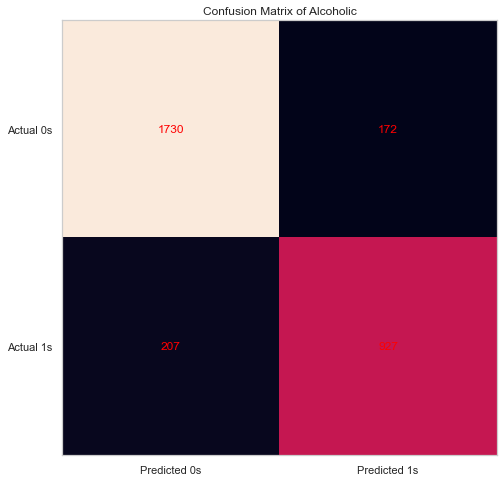

In [43]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.title('Confusion Matrix of Alcoholic')
plt.show()

In [44]:
df.isna().sum()

Trail#            0
SensorPosition    0
SensorNumber      0
SensorValue       0
alcoholic         0
paradigm          0
paradigm_class    0
dtype: int64

In [45]:
df.SensorNumber.unique()

array(['24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '145',
       '146', '147', '148', '149', '150', '151', '152', '153', '154',
       '155', '156', '157', '158', '159', '160', '161', '162', '163'

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X)

print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
#pca.components_

[0.4204003  0.15751053 0.08177794 0.04736727 0.03268823 0.0200012
 0.01396198 0.01104364 0.0101299  0.00954508]


In [48]:
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.fit_transform(X_test)

In [49]:
clf2 = RidgeClassifier().fit(x_train_pca,y_train)
clf2.score(x_test_pca,y_test)
#clf.score(X,y)

0.6307385229540918

In [50]:
x_full_pca = pca.fit_transform(X)
clf = RidgeClassifier().fit(x_train_pca,y_train)
clf.score(x_full_pca,y)

0.6222002635046113

In [51]:
import matplotlib.pyplot as plt
import matplotlib

In [52]:
pred_label = pred_label[:,None]

NameError: name 'pred_label' is not defined

Text(0.5, 1.0, 'Scree Plot')

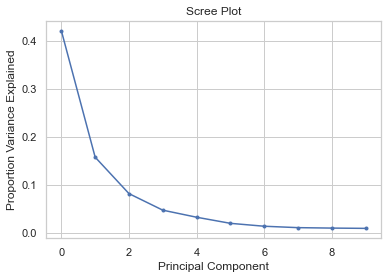

In [53]:
plt.plot(range(10),pca.explained_variance_ratio_,'b.-')
plt.ylabel('Proportion Variance Explained')
plt.xlabel('Principal Component')
plt.title('Scree Plot')